# Album Listening 2020

This year, I decided to listen to as many albums as possible. In the streaming era, many music listeners eschew the album for individual songs in playlists. I love doing that too, but I wanted to listen to music how the artists made it. So far, I have listened to 323 albums. Here are a series of visualizations that highlight aspects of my listening.

In [1]:
library("tidyverse")
library("scales")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




In [2]:
albums = read_csv("Albums 2020.csv")


── Column specification ────────────────────────────────────────────────────────
cols(
  Number = col_double(),
  Title = col_character(),
  Artist = col_character(),
  Year = col_double(),
  Division = col_character(),
  Women = col_character(),
  POC = col_character(),
  Score = col_double()
)




In [3]:
albums %>% head

Number,Title,Artist,Year,Division,Women,POC,Score
<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>
1,By and By,Caamp,2019,MLL,n,n,9
2,North Hills,Dawes,2009,MLL,n,n,10
3,Go Farther in Lightness,Gang of Youths,2017,MLL,n,y,10
4,Hallelujah Anyhow,Hiss Golden Messenger,2017,D1,n,n,9
5,Terms of Surrender,Hiss Golden Messenger,2019,D1,n,n,8
6,Crushing,Julia Jacklin,2019,MLL,y,n,9


An album is usually a 40 minute commitment. Why listen to something bad? My scores trend towards the positive, as this following visualization shows:

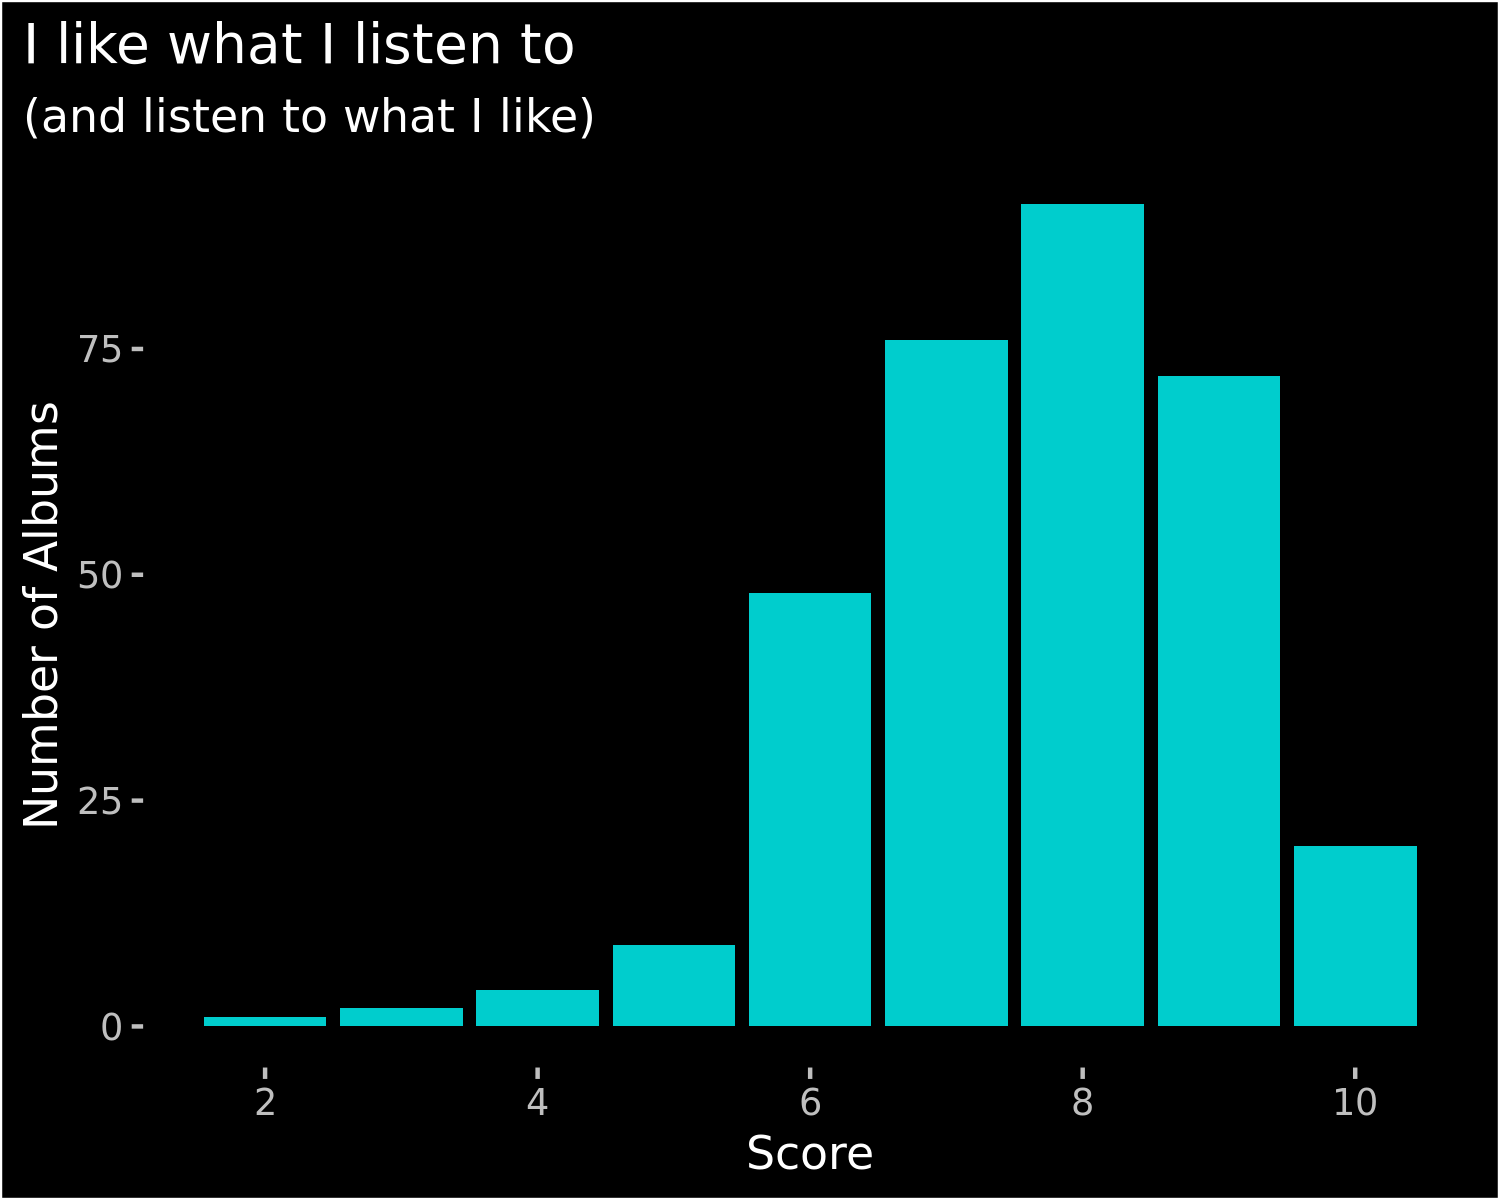

In [4]:
options(repr.plot.height = 4, repr.plot.width = 5, repr.plot.res = 300)

p = ggplot(albums, aes(x = Score))

p = p + geom_bar(fill = "cyan3")

p = p + labs(y = "Number of Albums", title = "I like what I listen to", subtitle = "(and listen to what I like)")

p = p + theme(panel.background = element_rect(fill = "black"),
             panel.grid.minor.x = element_blank(),
             panel.grid.minor.y = element_blank(),
              panel.grid.major.y = element_blank(),
              panel.grid.major.x = element_blank(),
             plot.background = element_rect(fill = "black"),
             plot.subtitle = element_text(color = "white"),
              plot.title = element_text(color = "white"),
             axis.title = element_text(color = "white"),
             plot.title.position = "plot",
             legend.background = element_rect(fill="black"),
              legend.box.background = element_rect(fill = "black"),
             legend.text = element_text(color = "white"),
             axis.text = element_text(colour = "grey75"),
             axis.ticks = element_line(colour = "grey75"))

p = p + scale_x_continuous(breaks = c(2, 4, 6, 8, 10))

p

# Over The Years

What were my statistics like for albums by release year?

In [5]:
year_counts = albums %>% 
                group_by(Year, Score) %>%
                count()

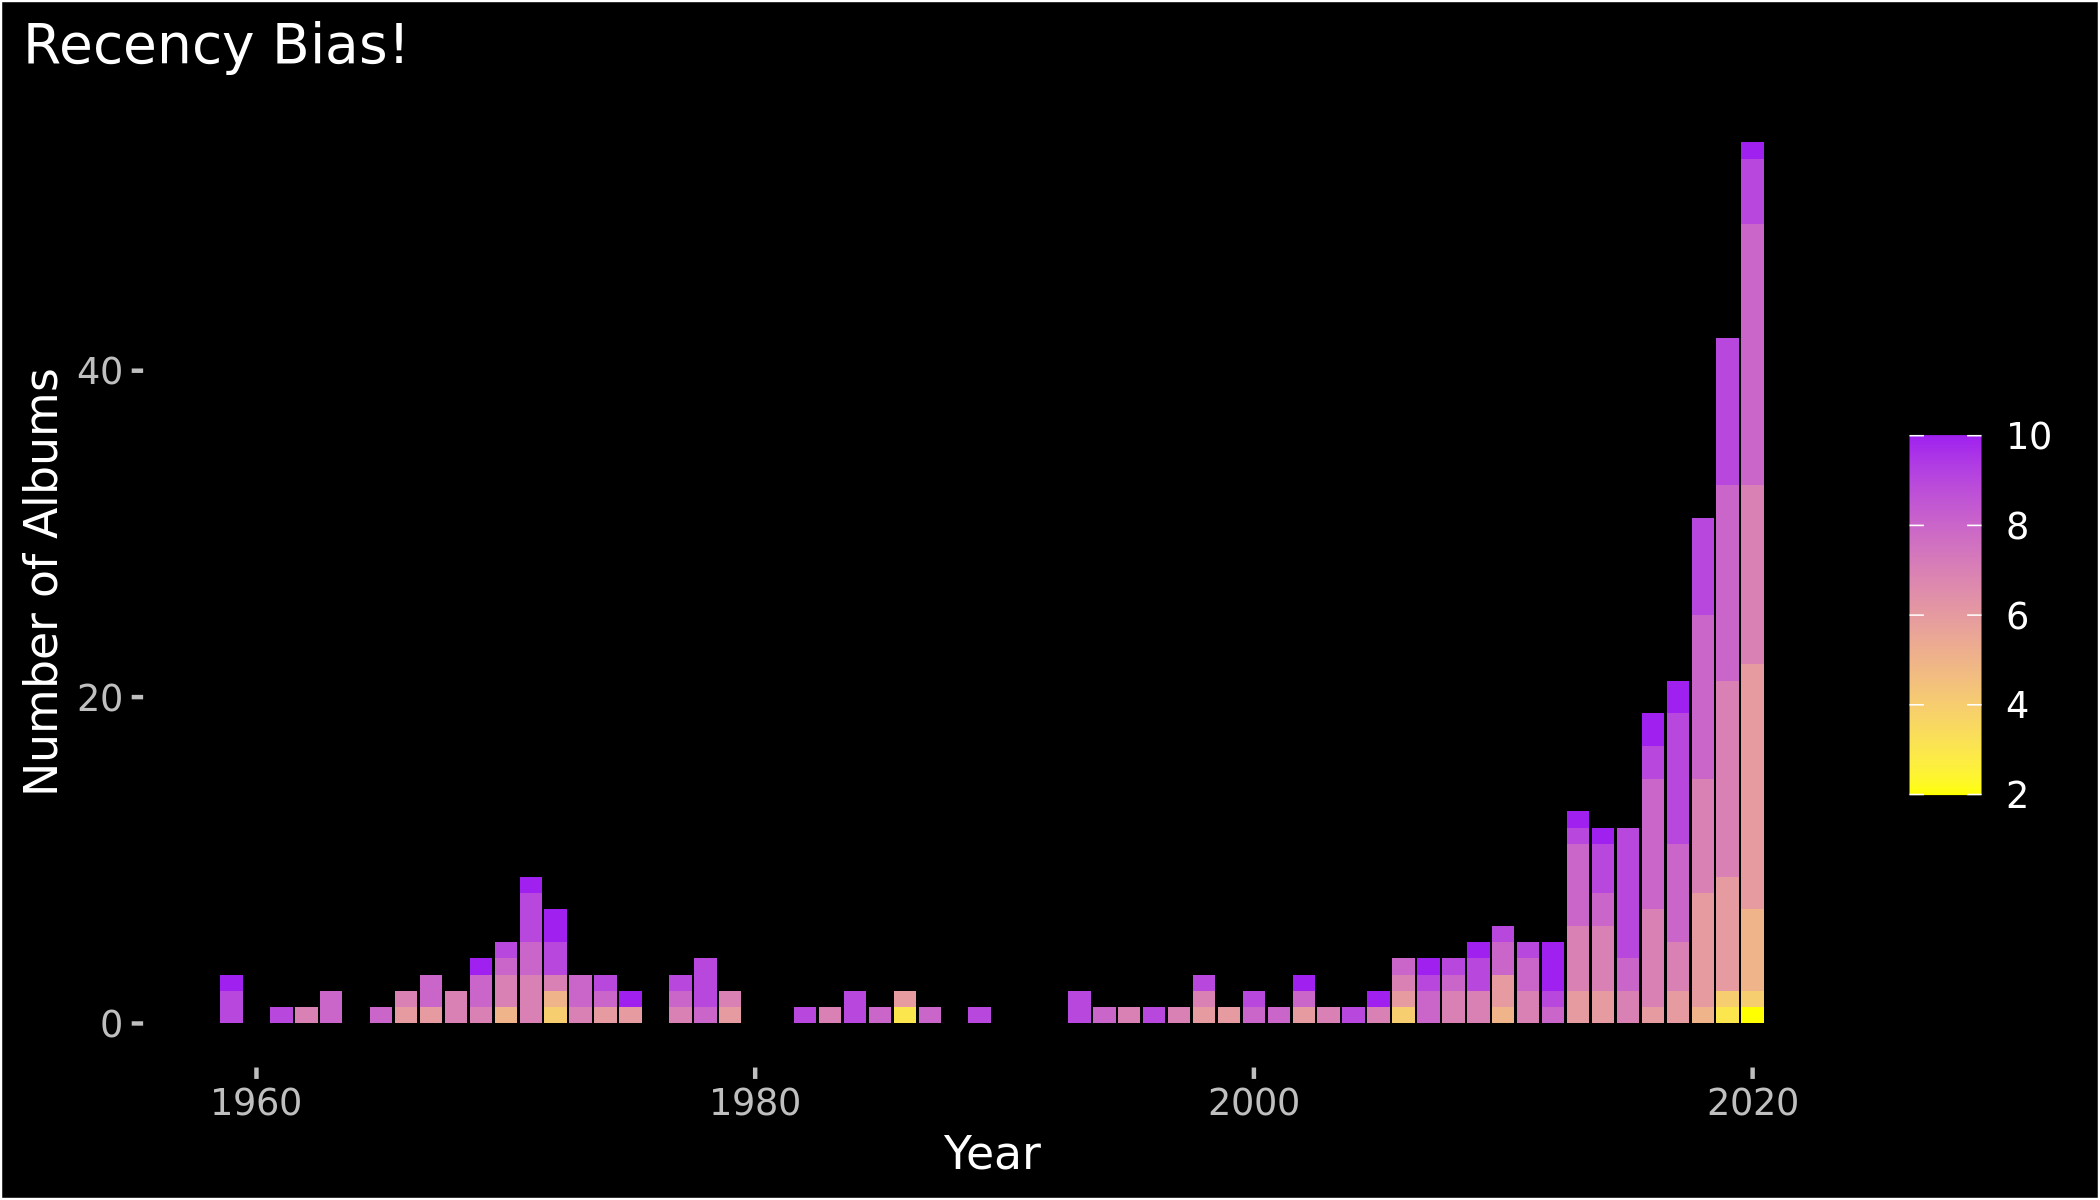

In [6]:
options(repr.plot.height = 4, repr.plot.width = 7, repr.plot.res = 300)

p = ggplot(year_counts, aes(x = Year, y = n, fill = Score))

p = p + geom_col()

p = p + scale_fill_gradient(low = "yellow", high = "purple")

p = p + theme(panel.background = element_rect(fill = "black"),
             panel.grid.minor.x = element_blank(),
             panel.grid.minor.y = element_blank(),
              panel.grid.major.y = element_blank(),
              panel.grid.major.x = element_blank(),
             plot.background = element_rect(fill = "black"),
             plot.subtitle = element_text(color = "white"),
              plot.title = element_text(color = "white"),
             axis.title = element_text(color = "white"),
             plot.title.position = "plot",
             legend.background = element_rect(fill="black"),
              legend.box.background = element_rect(fill = "black"),
             legend.text = element_text(color = "white"),
             axis.text = element_text(colour = "grey75"),
             axis.ticks = element_line(colour = "grey75"))

p = p + labs(y = "Number of Albums", title = "Recency Bias!")

p

My history is weak. I've been leaning heavily on more recent albums. 

Looks like I've been listening a pretty consistent caliber of music from year to year. I wonder what the highest average years are?

In [7]:
albums_year_score = albums %>%
                    group_by(Year) %>%
                    summarize(mean_score = mean(Score)) %>%
                    arrange(desc(mean_score))

`summarise()` ungrouping output (override with `.groups` argument)



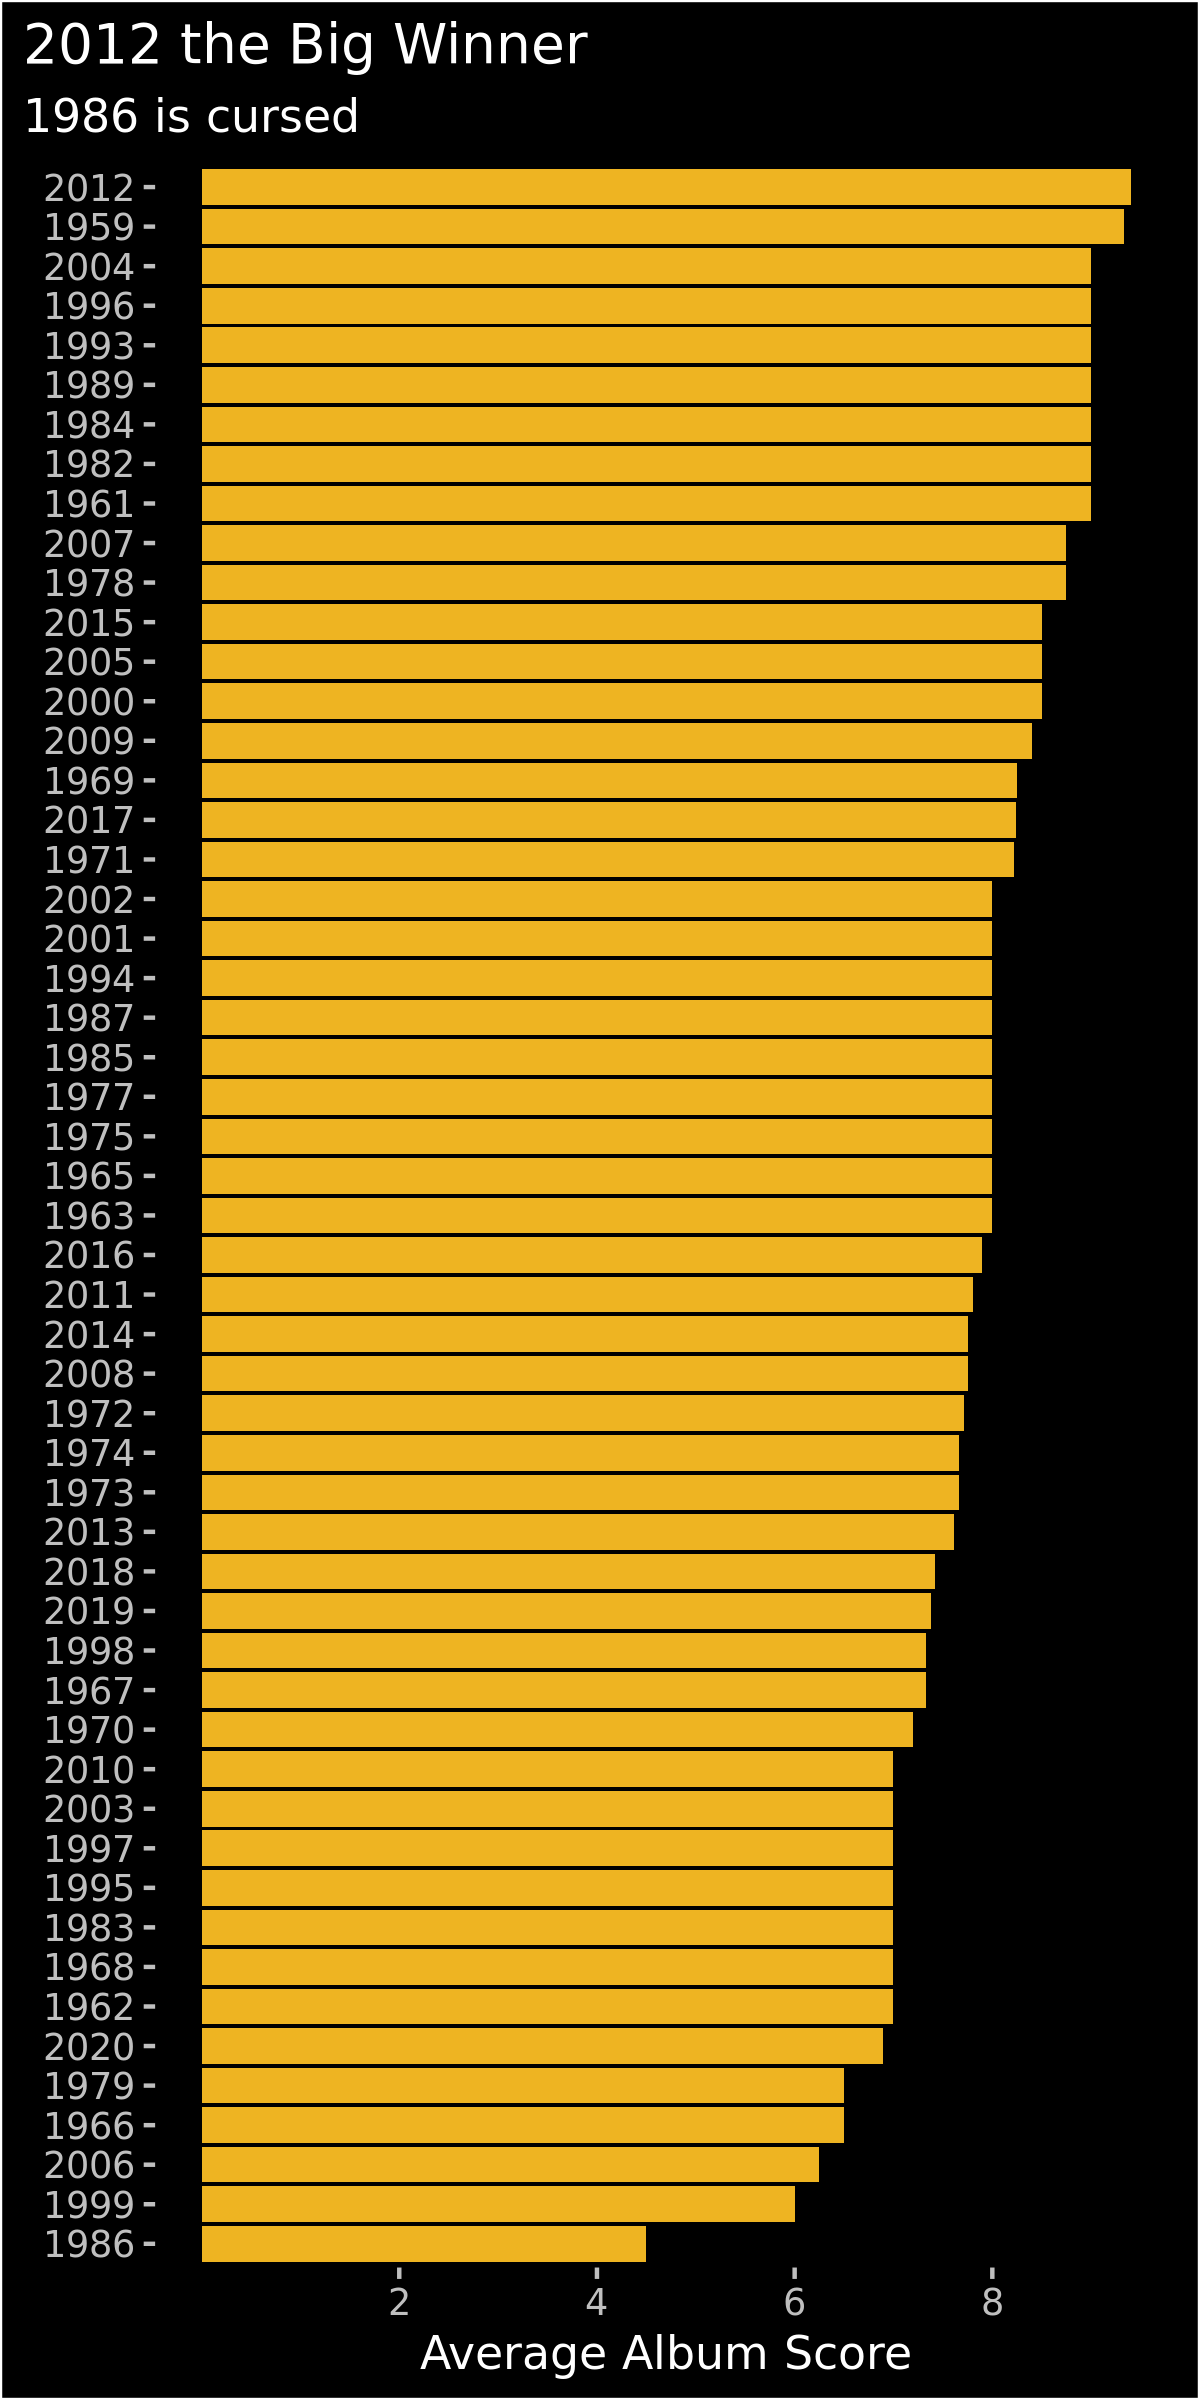

In [8]:
options(repr.plot.height = 8, repr.plot.width = 4, repr.plot.res = 300)

p = ggplot(albums_year_score, aes(x = reorder(Year, mean_score), y = mean_score))

p = p + geom_col(fill = "goldenrod2")

p = p + coord_flip()

p = p + theme(panel.background = element_rect(fill = "black"),
             panel.grid.minor.x = element_blank(),
             panel.grid.minor.y = element_blank(),
              panel.grid.major.y = element_blank(),
              panel.grid.major.x = element_blank(),
             plot.background = element_rect(fill = "black"),
             plot.subtitle = element_text(color = "white"),
              plot.title = element_text(color = "white"),
             axis.title = element_text(color = "white"),
             plot.title.position = "plot",
             legend.background = element_rect(fill="black"),
              legend.box.background = element_rect(fill = "black"),
             legend.text = element_text(color = "white"),
             axis.text = element_text(colour = "grey75"),
             axis.ticks = element_line(colour = "grey75"))

p = p + labs(x = element_blank(), y = "Average Album Score", title = "2012 the Big Winner", subtitle = "1986 is cursed")

p = p + scale_y_continuous(breaks = c(2, 4, 6, 8, 10))

p

What albums did I listen to in 2012 and 1986 that led to their distinctions?

In [9]:
albums %>%
    filter(Year == 1986 | Year == 2012) %>%
    arrange(desc(Year)) %>%
    print


# A tibble: 7 x 8
  Number Title             Artist                Year Division Women POC   Score
   <dbl> <chr>             <chr>                <dbl> <chr>    <chr> <chr> <dbl>
1     43 Lonesome Dreams   Lord Huron            2012 MLL      n     n        10
2    123 Live from Alabama Jason Isbell & the …  2012 D1       n     y         9
3    272 good kid, m.A.A.… Kendrick Lamar        2012 MLL      n     y        10
4    273 Channel Orange    Frank Ocean           2012 MLL      n     y        10
5    285 Out of Sorts      Atta Boy              2012 D1       y     n         8
6    253 Surely You Joust  Ray Stevens           1986 D3       n     n         3
7    321 Cold Snap         Albert Collins        1986 D2       n     y         6


1986 was torpedoed by Ray Stevens' "comedy" country album, "Surely You Joust." 2012 featured 3 of my favorite albums of all time along with a fantastic live album from Jason Isbell.

# Top Artists

Which artists got the most spins? Here is a report on artists who I dove into more than others 

In [10]:
albums_lumped = albums %>%
    mutate(Artist_lumped = Artist %>% fct_lump(n = 15) %>% fct_infreq() %>% fct_rev())
    
albums_lumped_no_other = albums_lumped %>% filter(Artist_lumped != "Other")


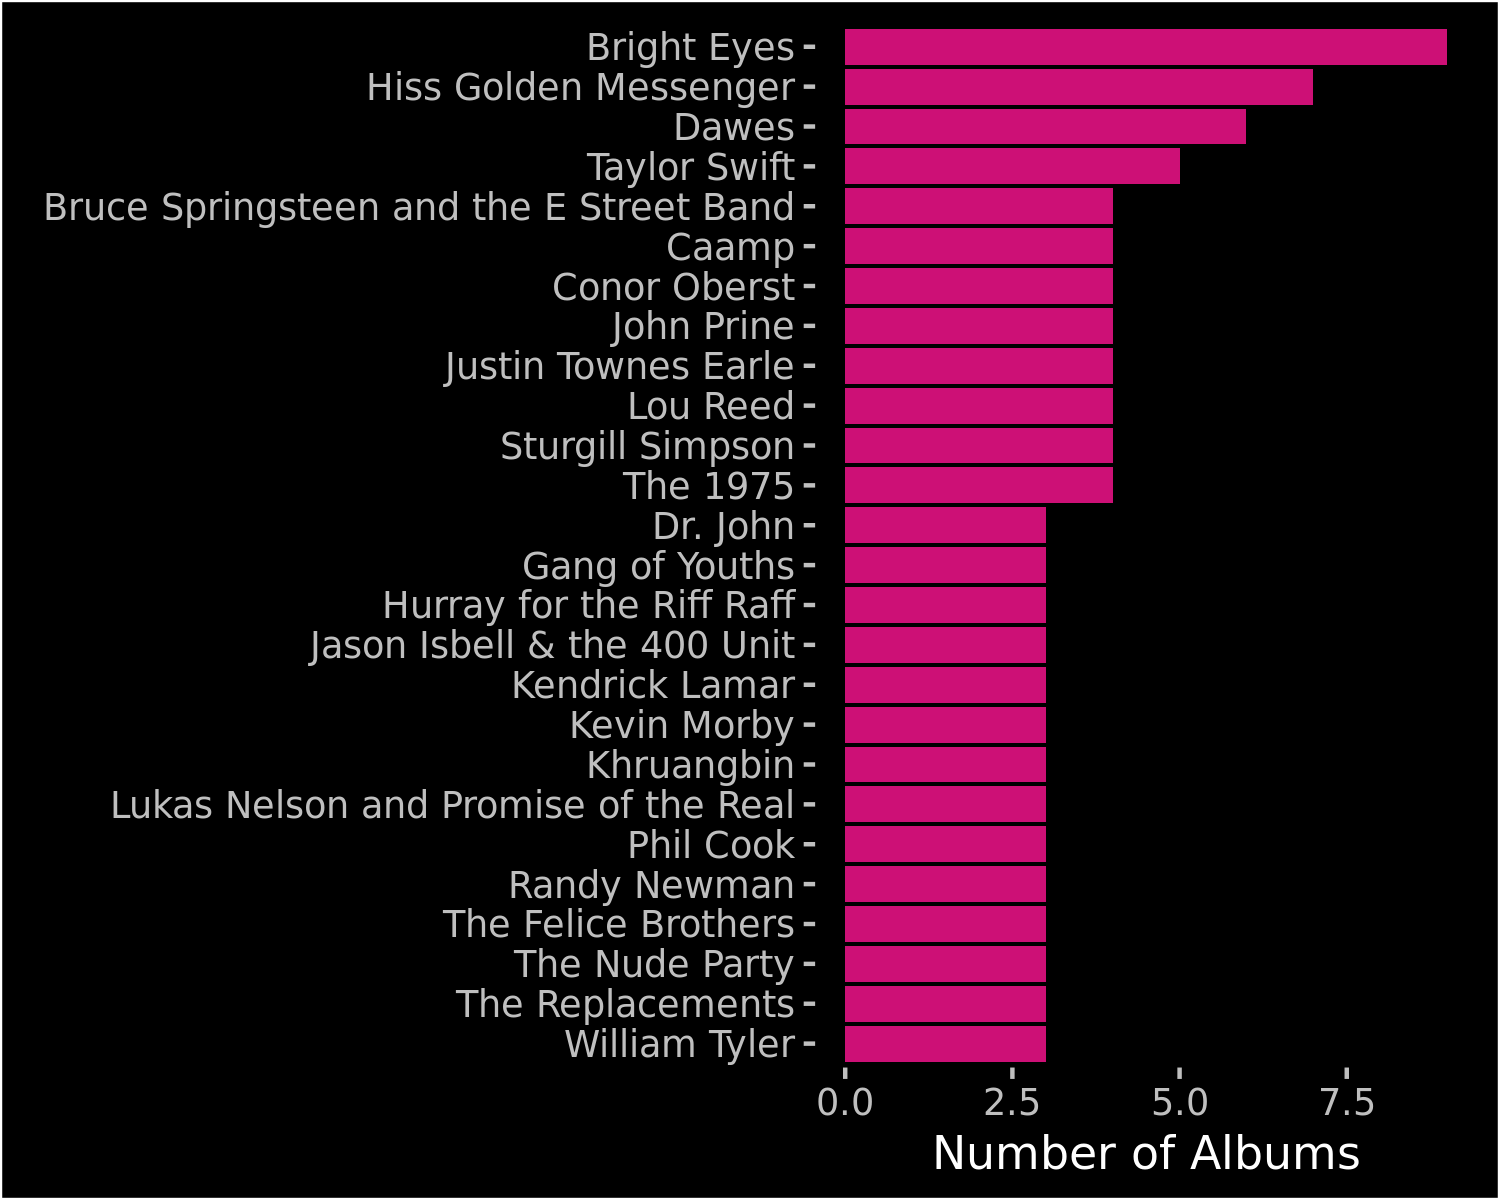

In [11]:
options(repr.plot.height = 4, repr.plot.width = 5, repr.plot.res = 300)

p = ggplot(albums_lumped_no_other, aes(y = Artist_lumped))

p = p + geom_bar(fill = "deeppink3")

p = p + theme(panel.background = element_rect(fill = "black"),
             panel.grid.minor.x = element_blank(),
             panel.grid.minor.y = element_blank(),
              panel.grid.major.y = element_blank(),
              panel.grid.major.x = element_blank(),
             plot.background = element_rect(fill = "black"),
             plot.subtitle = element_text(color = "white"),
              plot.title = element_text(color = "white"),
             axis.title = element_text(color = "white"),
             plot.title.position = "plot",
             legend.background = element_rect(fill="black"),
              legend.box.background = element_rect(fill = "black"),
             legend.text = element_text(color = "white"),
             axis.text = element_text(colour = "grey75"),
             axis.ticks = element_line(colour = "grey75"))

p = p + labs(y = element_blank(), x = "Number of Albums")

p

Looks like Bright Eyes is the big winner. Makes sense. They returned after a 9 year hiatus so I took a big dive into their back catalog to fully prepare. They've always had 2020 vibes. One article this summer said something like "this year has finally caught up to [lead singer] Oberst's apocalyptic fantasies. And reality isn't nearly as interesting."

![Bright Eyes in 2020](https://cdn.mos.cms.futurecdn.net/VWssVyVFD2N5r5VmWAgzpV-1024-80.jpg.webp)

But how deep is their catalog? How does the average Bright Eyes album compare to the average album I listened to of the other top played artists? Let's find out

In [12]:
albums_artist_score = albums_lumped_no_other %>%
                    group_by(Artist_lumped) %>%
                    summarize(mean_score = mean(Score)) %>%
                    arrange(desc(mean_score))

`summarise()` ungrouping output (override with `.groups` argument)



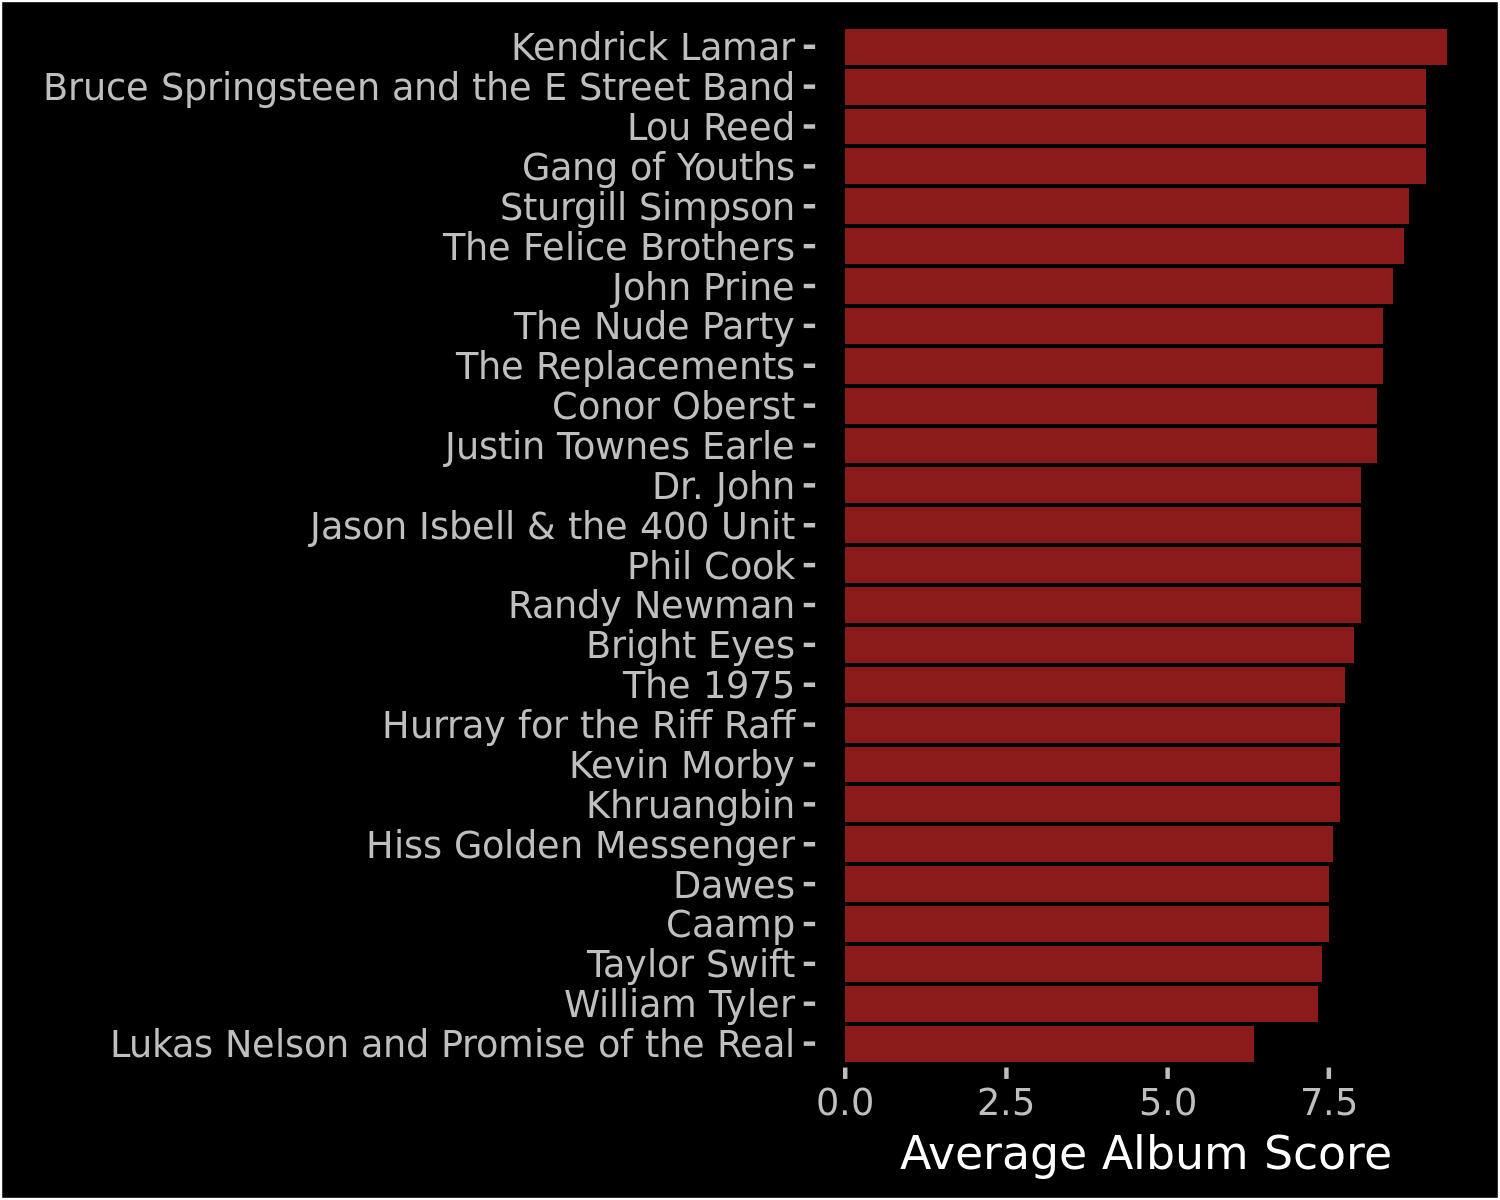

In [13]:
options(repr.plot.height = 4, repr.plot.width = 5, repr.plot.res = 300)

p = ggplot(albums_artist_score, aes(x = mean_score, y = reorder(Artist_lumped, mean_score)))

p = p + geom_col(fill = 'firebrick4')

p = p + theme(panel.background = element_rect(fill = "black"),
             panel.grid.minor.x = element_blank(),
             panel.grid.minor.y = element_blank(),
              panel.grid.major.y = element_blank(),
              panel.grid.major.x = element_blank(),
             plot.background = element_rect(fill = "black"),
             plot.subtitle = element_text(color = "white"),
              plot.title = element_text(color = "white"),
             axis.title = element_text(color = "white"),
             plot.title.position = "plot",
             legend.background = element_rect(fill="black"),
              legend.box.background = element_rect(fill = "black"),
             legend.text = element_text(color = "white"),
             axis.text = element_text(colour = "grey75"),
             axis.ticks = element_line(colour = "grey75"))

p = p + labs(y = element_blank(), x = "Average Album Score")

p

Here, Kendrick Lamar is the big winner. I'd have few arguments, as he's widely considered the best rapper of his generation, if not the best artist. 

![kdot](https://media.newyorker.com/photos/5f93325daafdd037851bf7d2/master/pass/Pearce-KendrickLamar.jpg)

The flip between the prior two figures of Kendrick and Taylor Swift would greatly upset my ex-girlfriend. We once got in a tiff because I said that Lamar's "To Pimp a Butterfly" should have won the Grammy over Swift's "1989." I love Taylor Swift but her love was closer to obsession. She threatened my sleeping on the floor. Anyway......

The commonality between Oberst and Lamar is their exceptional poetry. Two of the best living songwriters, for my money. In fact, that is the commonality for most of these top artists. Not only great musicians, but great songwriters as well. Springsteen, Reed, Newman, and Prine are unimpeachable. Sad to have lost both Prine and JTE this year. 

# Favorite Albums

Ok, so I listened to nearly an album a day this year. Which are my favorites? I'm not a music critic so I won't be out here proclaiming "best". But here are my top albums all time, sorted by year.

In [14]:
albums %>% 
    filter(Score == 10) %>%
    arrange(Year)

Number,Title,Artist,Year,Division,Women,POC,Score
<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>
232,Gunfighter Ballads and Trail Songs,Marty Robbins,1959,MLL,n,n,10
224,Led Zeppelin II,Led Zeppelin,1969,MLL,n,n,10
94,John Prine,John Prine,1971,MLL,n,n,10
11,Pink Moon,Nick Drake,1972,MLL,n,n,10
169,Transformer,Lou Reed,1972,MLL,n,n,10
179,Born to Run,Bruce Springsteen and the E Street Band,1975,MLL,n,y,10
54,LIFTED,Bright Eyes,2002,MLL,n,n,10
40,"I'm Wide Awake, It's Morning",Bright Eyes,2005,MLL,n,n,10
122,The Midnight Organ Fight,Frightened Rabbit,2007,MLL,n,n,10


Only 20 Perfect 10 albums all time. I need to do a little more digging into the 80's and 90's over the next month to round out this quest.

![marty](https://images-na.ssl-images-amazon.com/images/I/71AuvTik0VL._SX466_.jpg)
![frank](https://media.pitchfork.com/photos/5929be57c0084474cd0c2e8c/1:1/w_600/45e3c196.jpeg)
![sturg](https://images-na.ssl-images-amazon.com/images/I/81pSE1BvtbL._SL1425_.jpg)

# Favorite Albums of 2020

Terrible year for society, great year for music. First Perfect 10 album in 3 years. The return of Bright Eyes. A major indie label release from a friend of mine (now going by Skullcrusher). I wonder how this list might compare to the "End of Year" lists that are bound to arrive in the coming weeks. It's not an exact ranking due to the number redundancy, but I suspect there will be some overlap between this list and "Best of 2020" lists.

In [15]:
albums %>% 
    filter(Year == 2020) %>%
    filter(Score > 7) %>%
    arrange(desc(Score))

Number,Title,Artist,Year,Division,Women,POC,Score
<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>
154,Punisher,Phoebe Bridgers,2020,MLL,y,n,10
90,St. Cloud,Waxahatchee,2020,D1,y,n,9
205,Color Theory,Soccer Mommy,2020,D1,y,n,9
260,Midnight Manor,The Nude Party,2020,D1,n,n,9
268,Grae,Moses Sumney,2020,D1,n,y,9
91,"Forward, Children",Hiss Golden Messenger,2020,D1,n,n,8
113,Fetch the Bolt Cutters,Fiona Apple,2020,D1,y,n,8
115,Spook the Herd,Lanterns on the Lake,2020,D1,y,n,8
129,Reunions,Jason Isbell & the 400 Unit,2020,D1,y,y,8


Phoebe Bridgers would have made the top played artists section if I counted her other bands along with her solo projects. She's also a member of boygenius and Better Oblivion Community Center, which have each released one excellent album. She's a spectacular songwriter and this album is so 2020, especially the final track "I Know the End"

![pheebs](https://cdn.shopify.com/s/files/1/0255/7539/products/6a694cc5130f56be0bb5af84236584488d1f5dec_3000x.jpg?v=1592672265)

# The Bottom 10

We've seen the Top 20, but what summary is complete without a bottom 10? Turns out my least favorite album was one that a friend had me listen to. She said I might not like it but told me to listen to anyway. She was right. 

In [16]:
albums %>% 
    arrange(Score) %>%
    head(10)

Number,Title,Artist,Year,Division,Women,POC,Score
<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>
306,How I'm Feeling,LAUV,2020,D3,n,n,2
55,Old Technology,Ben Morrison,2019,D3,n,n,3
253,Surely You Joust,Ray Stevens,1986,D3,n,n,3
87,Magnetic Moves,Katie Toupin,2019,D3,y,n,4
133,Carnivore,Simon Dawes,2006,D3,n,n,4
204,Gypsy Cowboy,New Riders of the Purple Sage,1972,D3,n,n,4
322,Vintage Machine,Jackie Venson,2020,D3,y,y,4
14,Modern Johnny Sings,Theo Katzman,2020,D2,n,n,5
107,Naked Garden,Lukas Nelson and Promise of the Real,2020,D2,n,n,5


I like some of these artists quite a bit! Just not their best releases. Ray Stevens' "Surely You Joust" is terrible, but I expected no different. I bought a used copy at a record store for 2 bucks because I thought the cover was funny. He was one of those comedy country singers that had a weird level of popularity in the 70's and 80's.

![ray](https://img.discogs.com/XskPEa6QsWuexBQDfv9AVTJ-PPw=/fit-in/600x525/filters:strip_icc():format(jpeg):mode_rgb():quality(90)/discogs-images/R-12604101-1538426822-2687.jpeg.jpg)

Thanks for checking out my album listening summary! And thanks for everything this semester, I've learned so much!